In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [3]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir = '/opt/ml/input/data/train'

In [9]:
csv_path = os.path.join(train_dir, 'train.csv')
csv = pd.read_csv(csv_path)
image_dir = os.path.join(train_dir, 'images')
pathlist = csv['path'].tolist()
def parser(x):
    s = x.split('_')
    return [s[1], s[3]]
data = list(map(parser, pathlist))
df = pd.DataFrame(df)


In [26]:
df.columns = ['Sex', 'Age']
df['Age'] = df['Age'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     2700 non-null   object
 1   Age     2700 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.3+ KB


In [31]:
def age_categorize(age):
    if age < 30:
        return 0
    elif age < 60:
        return 1
    else:
        return 2
df['Age'] = df['Age'].apply(age_categorize)

In [33]:
df.sample(10)

,Sex,Age
1456,male,1
286,female,1
907,female,1
2385,female,0
438,female,0
2001,female,0
1537,male,1
2287,male,0
1485,female,1
1710,male,1


In [46]:
sex = df.groupby('Sex').count()
age = df.groupby('Age').count()
sex

,Age
Sex,
female,1658
male,1042


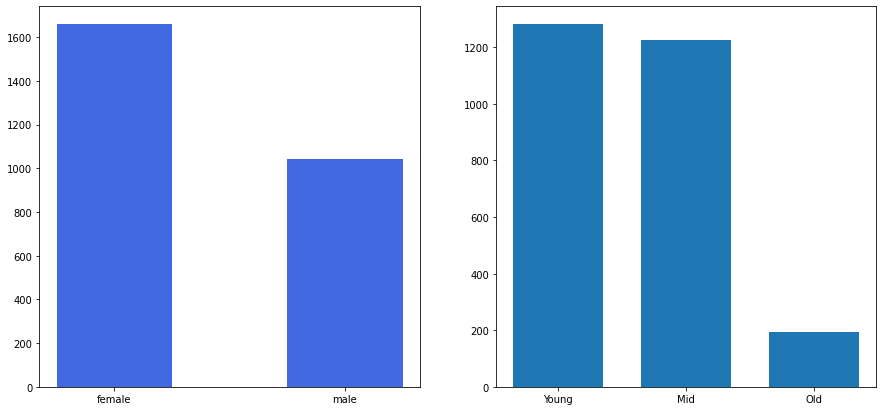

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].bar(sex.index, sex['Age'], width=0.5, color='royalblue')
axes[1].bar(['Young', 'Mid', 'Old'], age['Sex'], width=0.7)
plt.show()

In [52]:
age

,Sex
Age,
0,1281
1,1227
2,192
